In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Train Data

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [4]:
df_train = pd.read_csv('../input/gtsrb-german-traffic-sign/Train.csv')

In [5]:
df_train['Path']=df_train.Path.apply(lambda x: '../input/gtsrb-german-traffic-sign/'+x)

In [6]:
df_train['ClassId']=df_train.ClassId.astype(str)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  object
 7   Path     39209 non-null  object
dtypes: int64(6), object(2)
memory usage: 2.4+ MB


In [8]:
df_train # Path has ansoolute paths pointing to each image instead of just filenames

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,../input/gtsrb-german-traffic-sign/Train/20/00...
1,28,27,5,6,23,22,20,../input/gtsrb-german-traffic-sign/Train/20/00...
2,29,26,6,5,24,21,20,../input/gtsrb-german-traffic-sign/Train/20/00...
3,28,27,5,6,23,22,20,../input/gtsrb-german-traffic-sign/Train/20/00...
4,28,26,5,5,23,21,20,../input/gtsrb-german-traffic-sign/Train/20/00...
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,../input/gtsrb-german-traffic-sign/Train/42/00...
39205,56,58,5,5,51,53,42,../input/gtsrb-german-traffic-sign/Train/42/00...
39206,58,62,5,6,53,57,42,../input/gtsrb-german-traffic-sign/Train/42/00...
39207,63,69,5,7,58,63,42,../input/gtsrb-german-traffic-sign/Train/42/00...


In [9]:
width, height = 50,50
trainDatagen = datagen.flow_from_dataframe(df_train, directory=None, x_col='Path', y_col='ClassId',
                                           target_size=(width,height), class_mode = 'categorical', batch_size = 16, 
                                           subset='training')

Found 31368 validated image filenames belonging to 43 classes.


In [10]:
x, y = trainDatagen.next()

In [11]:
x.shape, y.shape

((16, 50, 50, 3), (16, 43))

## Test Data

In [12]:
df_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

In [13]:
df_test['Path']=df_test.Path.apply(lambda x: x[-9:])

In [14]:
df_test['ClassId']=df_test.ClassId.astype(str)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  object
 7   Path     12630 non-null  object
dtypes: int64(6), object(2)
memory usage: 789.5+ KB


In [16]:
df_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,00000.png
1,42,45,5,5,36,40,1,00001.png
2,48,52,6,6,43,47,38,00002.png
3,27,29,5,5,22,24,33,00003.png
4,60,57,5,5,55,52,11,00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,12625.png
12626,50,51,6,5,45,46,33,12626.png
12627,29,29,6,6,24,24,6,12627.png
12628,48,49,5,6,43,44,7,12628.png


In [17]:
testDatagen = datagen.flow_from_dataframe(df_test, directory='../input/gtsrb-german-traffic-sign/Test', x_col='Path', y_col='ClassId',
                                           target_size=(width,height), class_mode = 'categorical', batch_size = 16, 
                                           subset='training')

Found 10104 validated image filenames belonging to 43 classes.


In [18]:
x, y = testDatagen.next()
x.shape, y.shape

((16, 50, 50, 3), (16, 43))

In [19]:
model = Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=(50,50,3)))
model.add(MaxPool2D(strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D(strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D(strides=2))
model.add(BatchNormalization())

#Flatten
model.add(Flatten())

#2 Dense layers with 4000 hidden units
model.add(Dense(4000,activation='relu'))
model.add(Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(Dense(1000,activation='relu'))

#Softmax layer for output
model.add(Dense(43,activation='softmax'))

model.summary()

2022-08-17 14:02:05.626188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 14:02:05.877752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 14:02:05.881954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 14:02:05.887790: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 25, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 128)       5

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history= model.fit(trainDatagen, epochs=20, batch_size=64, validation_data = testDatagen, verbose=1)

2022-08-17 14:02:10.496703: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-08-17 14:02:13.173356: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1961/1961 [==============================] - 239s 117ms/step - loss: 0.9575 - accuracy: 0.7378 - val_loss: 5.3539 - val_accuracy: 0.6816
Epoch 2/20
1961/1961 [==============================] - 59s 30ms/step - loss: 0.2044 - accuracy: 0.9507 - val_loss: 6.7113 - val_accuracy: 0.7531
Epoch 3/20
1961/1961 [==============================] - 59s 30ms/step - loss: 0.1596 - accuracy: 0.9650 - val_loss: 8.7160 - val_accuracy: 0.7531
Epoch 4/20
1961/1961 [==============================] - 59s 30ms/step - loss: 0.1679 - accuracy: 0.9635 - val_loss: 15.3190 - val_accuracy: 0.7732
Epoch 5/20
1961/1961 [==============================] - 61s 31ms/step - loss: 0.1399 - accuracy: 0.9746 - val_loss: 14.1042 - val_accuracy: 0.7814
Epoch 6/20
1961/1961 [==============================] - 59s 30ms/step - loss: 0.0884 - accuracy: 0.9831 - val_loss: 16.4322 - val_accuracy: 0.7835
Epoch 7/20
1961/1961 [==============================] - 59s 30ms/step - loss: 0.1029 - accuracy: 0.9832 - val_loss: 18.3705 - val_

In [22]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.957479,0.737790,5.353927,0.681611
1,0.204400,0.950682,6.711258,0.753068
2,0.159551,0.964996,8.715965,0.753068
3,0.167918,0.963466,15.318971,0.773159
4,0.139948,0.974592,14.104213,0.781374
5,0.088410,0.983104,16.432178,0.783452
6,0.102932,0.983168,18.370525,0.790281
7,0.092816,0.983837,16.811058,0.790479
8,0.095879,0.983805,18.251387,0.797209
9,0.062634,0.988874,30.054514,0.790380


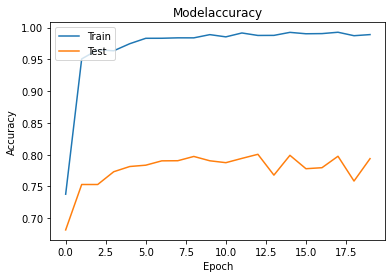

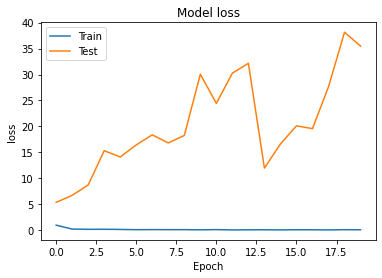

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()